# Laboratory on Measures of Central Tendency, Dispersion, and Shape

To examine the instruments in question, we will use the **Titanic** dataset. This is a classic dataset that reports some information, such as sex, age, boarding class, and survival of some passengers on the Titanic. You can find a version of the dataset at the following URL:

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

Let's load the dataset using the Pandas library:

In [2]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')

Display some information about the dataset:

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataset contains $891$ observations and $11$ columns. We visualize the first rows of the DataFrame to see how it is organized:

In [4]:
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

## Size

The size of the samples constituted by the individual columns can be obtained using the `len` method:

In [5]:
print(len(titanic['Age']))

891


The `len` method, however, does not consider incomplete data (the column might contain `NaN`s). To obtain a more accurate count, we can explicitly remove the `NaN`s with `dropna`:

In [6]:
print(len(titanic['Age'].dropna()))

714


As we can see, the sample is less numerous than it seemed. Alternatively, we can call `info` on the DataFrame:

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The schema above shows the number of `non-null` objects for each column. Consistent with what was seen before, we only have $714$ valid `Age` elements.

> **Question 1**
>
> What is the cardinality of `Cabin`?

## Central Tendency Indicators: Mean, Median, and Mode


### Mean

We can manually calculate the mean as follows

In [8]:
titanic['Age'].sum()/len(titanic['Age'].dropna())

29.69911764705882

Or simply using the `mean` function:

In [9]:
titanic['Age'].mean()

29.69911764705882

> **Question 2**
>
> In which cases does the mean summarize the data well? In which cases does it not?

### Median

We can calculate the median manually as follows:

In [10]:
import numpy as np
data_series = pd.Series([1, -2, 3, -4, 7])
print(data_series.sort_values())
print("Median: {}".format(data_series.sort_values().iloc[2]))

3   -4
1   -2
0    1
2    3
4    7
dtype: int64
Mediana: 1


o alternatively using the `median` method:

In [11]:
a.median()

1.0

Let's calculate the median value of `Age` for example:

In [12]:
titanic['Age'].median()

28.0

> **Question 3**
>
> Compare the mean of `Age` with its median. Do the two values correspond? Why? Which of the two values is equal to one of the values belonging to the sample?

### Quantiles, Percentiles, and Quartiles

In pandas, quantiles are obtained using the `quantile` method:

In [13]:
print("0th quantile (minimum):", titanic['Age'].quantile(0))
print("0.5th quantile (median):", titanic['Age'].quantile(0.5))
print("1st quantile (maximum):", titanic['Age'].quantile(1))
print("0.15th quantile:", titanic['Age'].quantile(0.15))

Quantile di ordine 0 (minimo): 0.42
Quantile di ordine 0.5 (mediana): 28.0
Quantile di ordine 1 (massimo): 80.0
Quantile di ordine 0.15: 17.0


Percentiles are always obtained using the `quantile` function, dividing the percentile order by 100:

In [14]:
print("50% order percentile (median):", titanic['Age'].quantile(50/100))
print("30% order percentile:", titanic['Age'].quantile(30/100))

Percentile di ordine 50% (mediana): 28.0
Percentile di ordine 30%: 22.0


Analogously, quartiles are obtained by dividing the quartile's order by 4:

In [15]:
print("Order 0 quartile (minimum):", titanic['Age'].quantile(0/4))
print("Order 1 quartile:", titanic['Age'].quantile(1/4))
print("Order 2 quartile (median):", titanic['Age'].quantile(2/4))
print("Order 3 quartile:", titanic['Age'].quantile(3/4))
print("Order 4 quartile (maximum):", titanic['Age'].quantile(4/4))

Quartile di ordine 0 (minimo): 0.42
Quartile di ordine 1: 20.125
Quartile di ordine 2 (mediana): 28.0
Quartile di ordine 3: 38.0
Quartile di ordine 4 (massimo): 80.0


> **Question 4**
>
> Quartiles, like the minimum and maximum, also allow us to get an idea of the order of magnitude of the analyzed data, however, quartiles have an advantage, what is it?

### Mode
We can calculate the mode manually as follows:

In [16]:
print(titanic['Age'].value_counts().head())
print("Mode: ",titanic['Age'].value_counts().index[0])

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64
Moda:  24.0


Alternatively, we can use the `mode` function:

In [17]:
titanic['Age'].mode()

0    24.0
Name: Age, dtype: float64

> **Question 5**
>
> Compare the mode of `Age` with its mean. Do the values correspond? Why?

## Measures of Dispersion

### Minimum, Maximum, and Range
Maximum, minimum, and range are calculated simply as follows:

In [18]:
print("Minimum:", titanic['Age'].min())
print("Maximum:", titanic['Age'].max())
print("Range:", titanic['Age'].max() - titanic['Age'].min())

Minimo: 0.42
Massimo: 80.0
Range: 79.58


> **Question 6**
>
> Is the range a robust measure of dispersion in the presence of "outliers"?

### Interquartile Range
We can calculate the interquartile range as follows:

In [19]:
q11,q13 = titanic[titanic['Sex']=='male']['Age'].quantile([1/4,3/4])
q21,q23 = titanic[titanic['Sex']=='female']['Age'].quantile([1/4,3/4])
print("The interquartile range of sample 1 is:",q13-q11)
print("The interquartile range of sample 2 is:",q23-q21)

Lo scarto interquartile di sample 1 è: 18.0
Lo scarto interquartile di sample 2 è: 19.0


> **Question 7**
>
> Is the interquartile distance always a robust measure of dispersion? What happens in the case of strongly asymmetric distributions?

### Variance and Standard Deviation


Variance can be calculated by calling the `var` method:

In [20]:
print(titanic[titanic['Sex']=='male']['Age'].var())
print(titanic[titanic['Sex']=='female']['Age'].var())

215.44957942429036
199.0962330533453


The **standard deviation** is calculated using the `std` method:

In [21]:
print("Sample standard deviation:",titanic['Age'].std(),"years")

Deviazione standard del campione: 14.526497332334044 anni


The standard deviation also tells us something about the "shape" of the distribution. Let's compare, for example, the standard deviations of the ages of passengers belonging to the three boarding classes:

In [22]:
titanic.groupby('Pclass')['Age'].std()

Pclass
1    14.802856
2    14.001077
3    12.495398
Name: Age, dtype: float64

Let's now compare the densities estimated from the three samples:

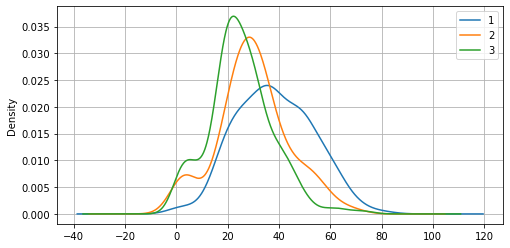

In [24]:
from matplotlib import pyplot as plt
titanic.groupby('Pclass')['Age'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

> **Question 8**
>
> Is there a relationship between the standard deviations of samples and their respective densities? Which one?

#### Normalization between 0 and 1
According to normalization between 0 and 1, data are rescaled as follows:

$$
x_{norm} = (x-x_{min})/(x_{max}-x_{min})
$$

We can perform this transformation in Pandas as follows:

In [25]:
normalized_age_01 = (titanic['Age']-titanic['Age'].min())/(titanic['Age'].max()-titanic['Age'].min())

We verify that the endpoints of the new sample are 0 and 1:

In [26]:
print(age_norm_01.min(), age_norm_01.max())

0.0 1.0


#### Normalization between -1 and 1
The data is rescaled as follows:

$$
x_{norm} = (x_{max}+x_{min}-2\cdot x)/(x_{max}-x_{min})
$$

We can perform this transformation in Pandas as follows:

In [27]:
age_norm_11 = (titanic['Age'].max()+titanic['Age'].min()-2*titanic['Age'])/(titanic['Age'].max()-titanic['Age'].min())

Let's check that the extremes of the new sample are -1 and 1:

In [28]:
print(age_norm_11.min(), age_norm_11.max())

-1.0 1.0


### Standardization (z-scoring)

We can perform this normalization using the `zscore` function from `scipy`:

In [29]:
from scipy.stats import zscore
zscore([0,1,2,3,4])

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

We apply this normalization to the ages of the Titanic passengers:

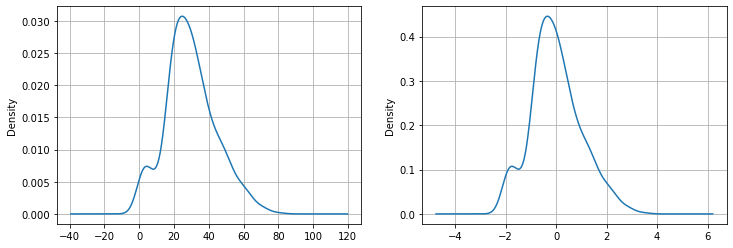

In [38]:
age_z=zscore(titanic['Age'].dropna())
plt.figure(figsize=(12,4))
plt.subplot(121)
titanic['Age'].plot.density()
plt.grid()
plt.subplot(122)
age_z.plot.density()
plt.grid()
plt.show()

### Shape Indicators

#### Asymmetry (skewness)
I can calculate the skewness value using the Pandas `skew` method. Let's look at a couple of examples on the weights and heights dataset:

In [81]:
titanic.skew()

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31494/1596635564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Let's compare the results with the density estimates:

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

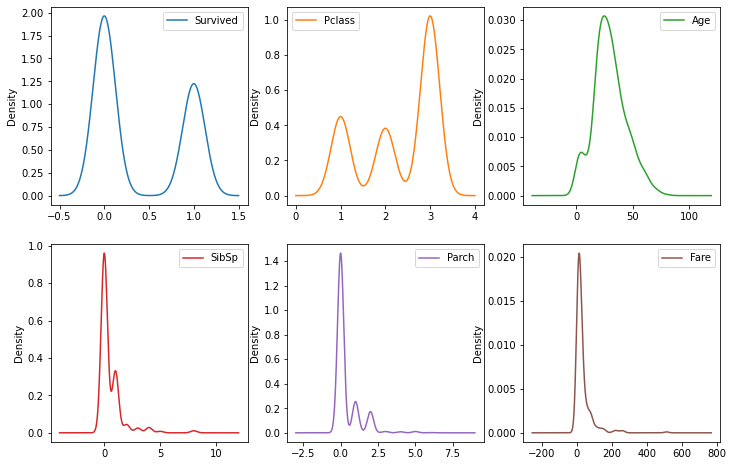

In [76]:
titanic.plot.density(subplots=True, layout=(2,3), figsize=(12,8), sharex=False)

The skewness values of weights and heights will be:

In [77]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')

print(f"Weight skewness: {hw['weight'].skew():0.2f}")
print(f"Height skewness: {hw['height'].skew():0.2f}")

Skweness pesi: 0.57
Skweness altezza: 0.19


Comparing with densities:

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

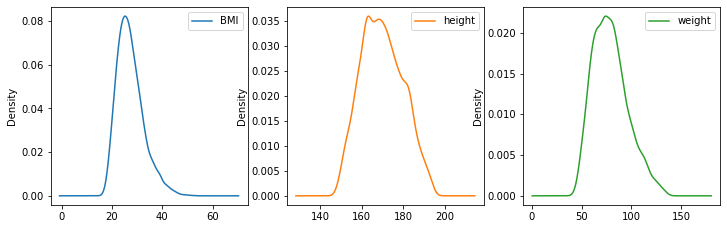

In [78]:
hw.plot.density(subplots=True, layout=(2,3), figsize=(12,8), sharex=False)

#### Curtosis (kurtosis)
Similarly, we can calculate the curtosis using the `Kurtosis` method:

In [85]:
titanic.kurtosis()

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31494/3071249296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.kurtosis()


Survived    -1.775005
Pclass      -1.280015
Age          0.178274
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64

In [86]:
hw.kurtosis()

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31494/4227707798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hw.kurtosis()


BMI       0.917179
height   -0.687287
weight   -0.056386
dtype: float64

## Boxplot

We can visualize a boxplot directly using `Pandas`:

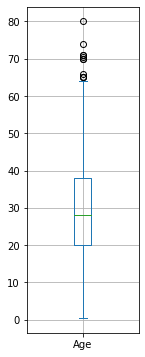

In [39]:
from matplotlib import pyplot as plt
titanic['Age'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Alternatively, we can show a boxplot using matplotlib:

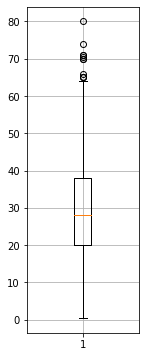

In [40]:
plt.figure(figsize=(2,6))
plt.boxplot(titanic['Age'].dropna()) # insert dropna to eliminate NaNs
plt.grid()
plt.show()

### Multiple Boxplots

Using `Pandas`, you can display the boxplots of all numeric variables in a DataFrame as follows:

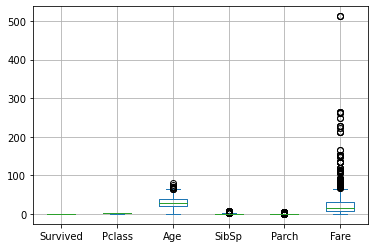

In [41]:
titanic.plot.box()
plt.grid()
plt.show()

If we want to narrow the analysis to a few variables, we can select only the variables of interest as follows:

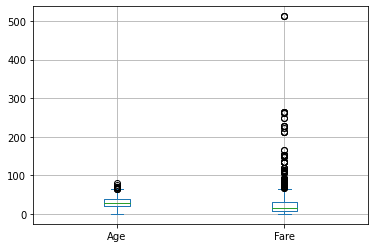

In [42]:
titanic[['Age','Fare']].plot.box()
plt.grid()
plt.show()

It is also possible to compare the boxplots of different samples. Suppose we want to compare the ages of men and women:

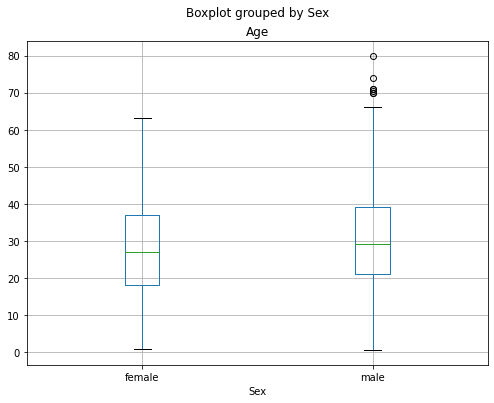

In [43]:
titanic.boxplot(by='Sex',column=['Age'], figsize=(8,6))
plt.show()

In the case of multiple variables:

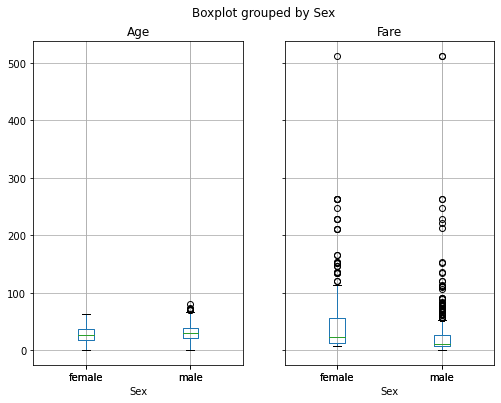

In [44]:
titanic.boxplot(by='Sex',column=['Age','Fare'], figsize=(8,6))
plt.show()

We can also combine boxplots with a `groupby`. For example, let's compare the fares paid by men and women belonging to the three boarding classes:

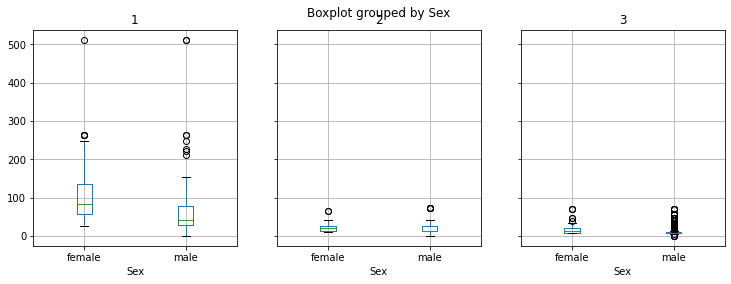

In [45]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Fare'], figsize=(12,4), layout=(1,3))
plt.show()

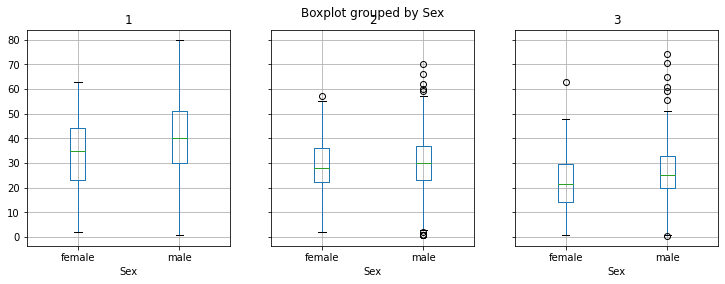

In [46]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Age'], figsize=(12,4), layout=(1,3))
plt.show()

> **Question 9**
>
> Compare the ages of women and men in the various boarding classes. In which class are there notable differences between the ages of men and women?

## Exercises

> Exercise 1
> 
> Considering the Titanic dataset, calculate for each variable the count, mean, standard deviation, minimum, maximum, median, first quartile, and third quartile. After calculating the requested values individually, use the `describe` method to obtain these values. Which variable is the most dispersed?

> Exercise 2
> 
> Considering the Titanic dataset, for each of the three classes, calculate the mean and variance of passenger ages. In which class are the ages least dispersed? Which class contains the youngest individuals? Complete the analysis with bar charts.